In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydf= pd.read_csv(city_data_to_load)
ridedf=pd.read_csv(ride_data_to_load)
citydf.head()

# Combine the data into a single dataset
maindf= pd.merge(citydf, ridedf, how="outer", on="city")
# Display the data table for preview
maindf.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#average Fare Per City
avgfaredf= maindf.groupby(["type","city"],as_index=True)
CTsumfare= avgfaredf.fare.sum()
ctsf= pd.DataFrame({"Total_Fare":CTsumfare})
CTridepc= avgfaredf.ride_id.count()
ctrpc= pd.DataFrame({"Ride_Count": CTridepc})
ctsf= ctsf.merge(ctrpc, on= "city", how= "outer")
ctsf["Average_Fare"]= (ctsf["Total_Fare"] / ctsf["Ride_Count"])
ctsf= ctsf.merge(citydf, on= "city", how="outer")
urbandf= ctsf.loc[ctsf.type == "Urban"]
ruraldf= ctsf.loc[ctsf.type == "Rural"]
suburbandf= ctsf.loc[ctsf.type == "Suburban"]
ruraldf.columns

Index(['city', 'Total_Fare', 'Ride_Count', 'Average_Fare', 'driver_count',
       'type'],
      dtype='object')

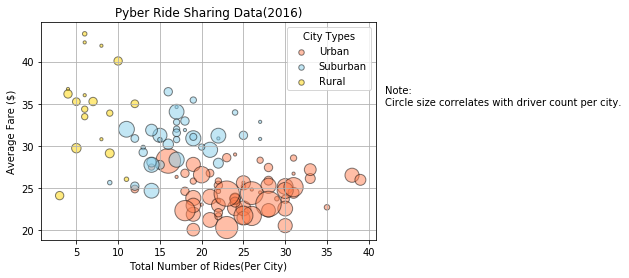

In [18]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types
urban= plt.scatter(urbandf.Ride_Count, urbandf.Average_Fare, s=ctsf.driver_count * 10, c=["coral"], edgecolor="black", alpha= .50)
suburban= plt.scatter(suburbandf.Ride_Count, suburbandf.Average_Fare, s=ctsf.driver_count *10,c=["skyblue"],edgecolor="black", alpha= .50)
rural= plt.scatter(ruraldf.Ride_Count, ruraldf.Average_Fare, s=ctsf.driver_count *10,c=["gold"],edgecolor="black", alpha= .50)
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
# Create a legend
lgnd= plt.legend((urban,suburban, rural),("Urban","Suburban","Rural"),title= "City Types", loc="upper right")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
textstr = 'Note:\nCircle size correlates with driver count per city.\n'
plt.text(42,33.5, textstr, fontsize=10)
# Save Figure
plt.savefig("../Images/bubbleplot.png")

In [4]:
# Show plot
plt.show()

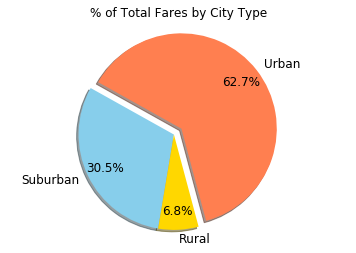

<Figure size 432x288 with 0 Axes>

In [5]:
# Calculate Type Percents
ufares= urbandf.Total_Fare.sum()
sufares= suburbandf.Total_Fare.sum()
rfares= ruraldf.Total_Fare.sum()

types= ["Urban","Suburban","Rural"]
sumfares= [ufares, sufares, rfares]
colors= ["coral", "skyblue", "gold"]
explode= (0.1,0,0)
# Build Pie Chart
plt.pie(sumfares, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", startangle= -75, 
        pctdistance= .80, textprops={'fontsize': 12}, shadow=True)

plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()
# Save Figure
plt.savefig("../Images/typepercent.png")

In [6]:
# Show Figure
plt.show()

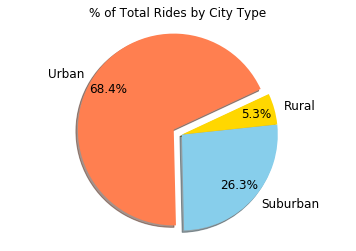

<Figure size 432x288 with 0 Axes>

In [7]:
# Calculate Ride Percents
urides =urbandf.Ride_Count.sum()
surides =suburbandf.Ride_Count.sum()
rrides =ruraldf.Ride_Count.sum()

types= ["Urban","Suburban","Rural"]
sumrides= [urides, surides, rrides]
colors= ["coral", "skyblue", "gold"]
explode= (0.1,0,0)
# Build Pie Chart
plt.pie(sumrides, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", startangle= 25, 
        pctdistance= .80, textprops={'fontsize': 12}, shadow=True)

plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()
# Save Figure
plt.savefig("../Images/ridepercent.png")

In [8]:
# Show Figure
plt.show()

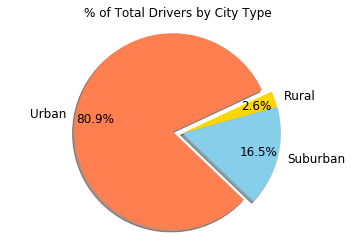

<Figure size 432x288 with 0 Axes>

In [9]:
# Calculate Driver Percents
udriver =urbandf.driver_count.sum()
sudriver =suburbandf.driver_count.sum()
rdriver =ruraldf.driver_count.sum()

types= ["Urban","Suburban","Rural"]
sumdriver= [udriver, sudriver, rdriver]
colors= ["coral", "skyblue", "gold"]
explode= (0.1,0,0)
# Build Pie Chart
plt.pie(sumdriver, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", startangle= 25, 
        pctdistance= .80, textprops={'fontsize': 12}, shadow=True)

plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()
# Save Figure
plt.savefig("../Images/driverspercent.png")

In [10]:
# Show Figure
plt.show()

In [ ]:
#OBSERVABLE TRENDS
#1) Rural rides have a propensity to result in higher fares, suggesting either higher rates for per mile or greater distances. 
#2) Urban locations have more drivers per city than Suburban or Rural. 
#3) Average fare($) for Urban locations tends to be lower, suggesting either lower rates per mile or lower overall distances.